<a href="https://colab.research.google.com/github/MLSBHARGAVASAI/VOIS_AICTE_Oct2025_MajorProject_MLSBHARGAVA_SAI/blob/main/Netflix_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Dataset Analysis: Content Trends for Strategic Recommendations


## Introduction

The dataset under consideration is a Netflix dataset containing 7,789 records and 11 columns.
It includes details about Movies and TV Shows available on the platform.

**Columns:**
- Show_Id
- Category
- Title
- Director
- Cast
- Country
- Release_Date
- Rating
- Duration
- Type
- Description

The dataset spans multiple years (2008–2021) and covers content across diverse countries and genres.


## Problem Statement

Netflix is a global streaming platform facing competition from Amazon Prime, Disney+, and other OTT services.
The goal of this project is:

**Content Trends Analysis for Strategic Recommendations**

We aim to uncover:
- How Netflix’s content distribution (Movies vs. TV Shows) has evolved.
- Popular genres over the years.
- Country-wise contributions to Netflix’s catalog.

This analysis will provide insights for strategic decision-making and content planning.


## Objectives

- Analyze the distribution of Movies vs. TV Shows over the years.
- Identify the most common genres and how their popularity has changed.
- Compare country-wise contributions to Netflix’s catalog.


**Import Libraries**

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


**Load Dataset**

In [2]:
df = pd.read_csv('/content/Netflix Dataset.csv')  # Replace with your file path
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Explore Dataset**

In [3]:
print("Dataset Shape:", df.shape)
df.info()
df.isnull().sum()

Dataset Shape: (7789, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


**Data Cleaning**

In [4]:
# Drop duplicates
df = df.drop_duplicates()

# Fill missing values
df['Country'] = df['Country'].fillna('Unknown')
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Not Rated')

# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

**Movies vs TV Shows Distribution**

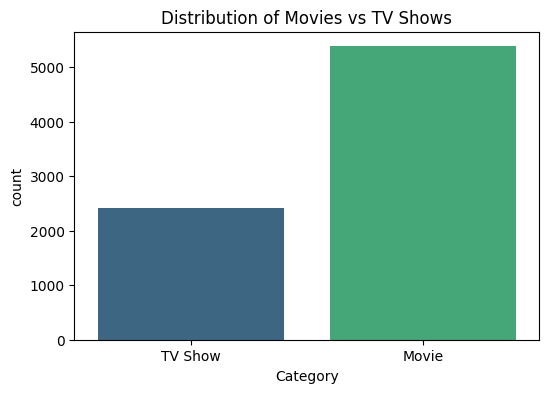

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Distribution of Movies vs TV Shows')
plt.show()


**Content Distribution Over Years**

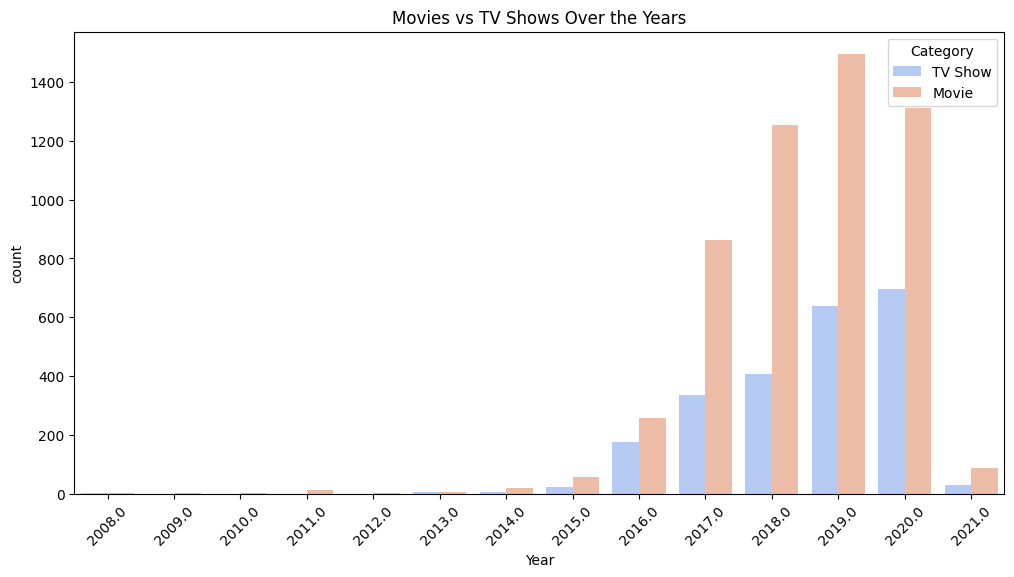

In [7]:
df['Year'] = df['Release_Date'].dt.year

plt.figure(figsize=(12,6))
sns.countplot(x='Year', hue='Category', data=df, palette='coolwarm')
plt.title('Movies vs TV Shows Over the Years')
plt.xticks(rotation=45)
plt.show()


**Country-wise Contributions**

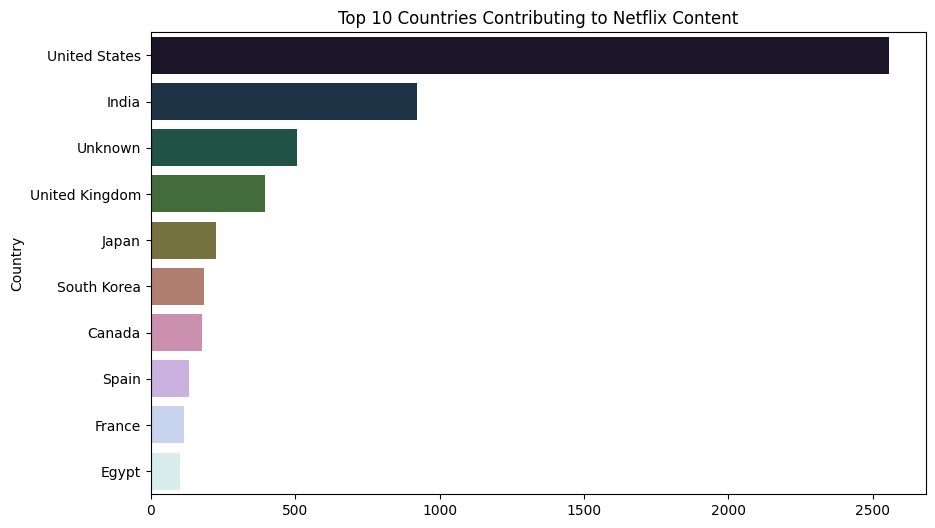

In [8]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='cubehelix')
plt.title('Top 10 Countries Contributing to Netflix Content')
plt.show()

**Duration Analysis**

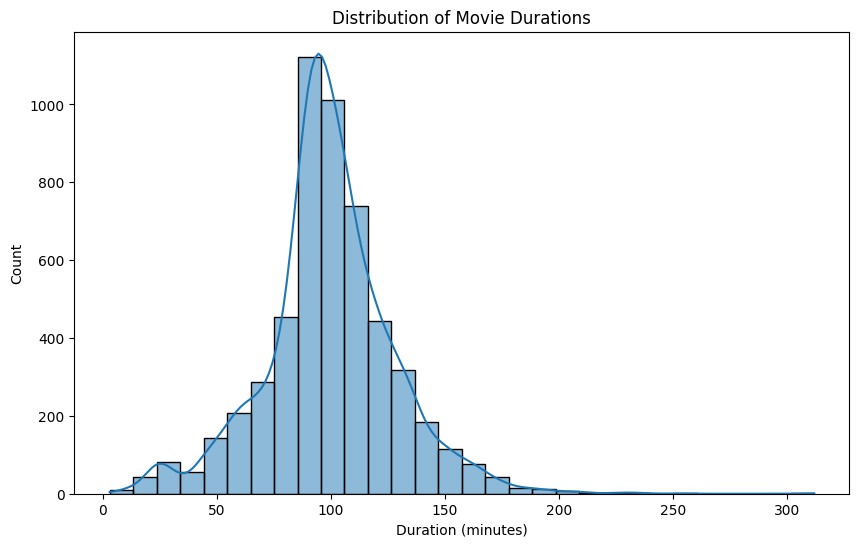

In [11]:
df['Duration_min'] = df['Duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,6))
sns.histplot(df[df['Category']=='Movie']['Duration_min'], bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()


**Rating Distribution**

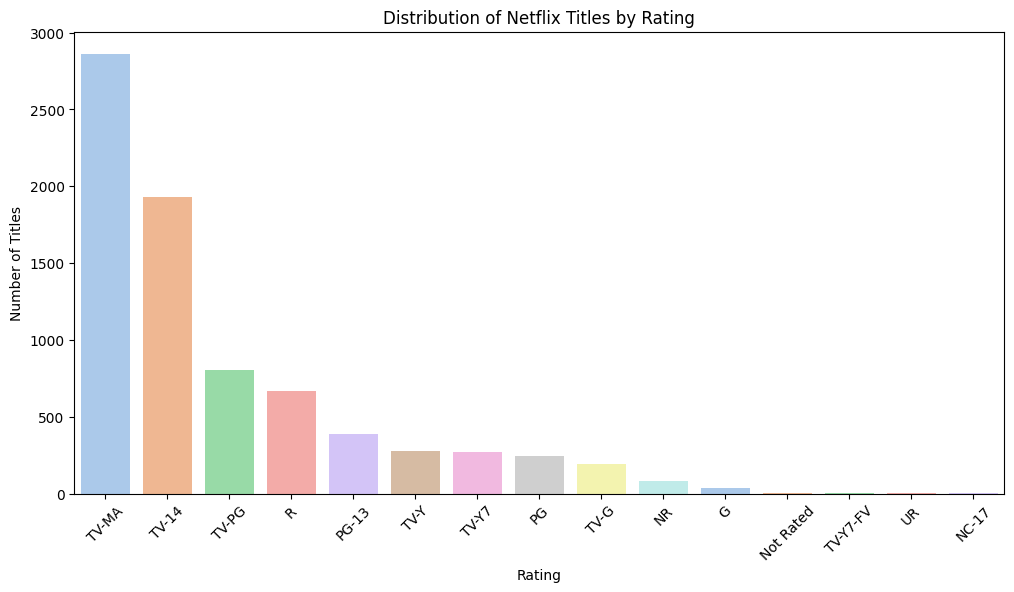

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index, palette='pastel')
plt.title('Distribution of Netflix Titles by Rating')
plt.xticks(rotation=45)
plt.ylabel('Number of Titles')
plt.show()


**Average Duration by Category (Audience Watch Time Proxy)**

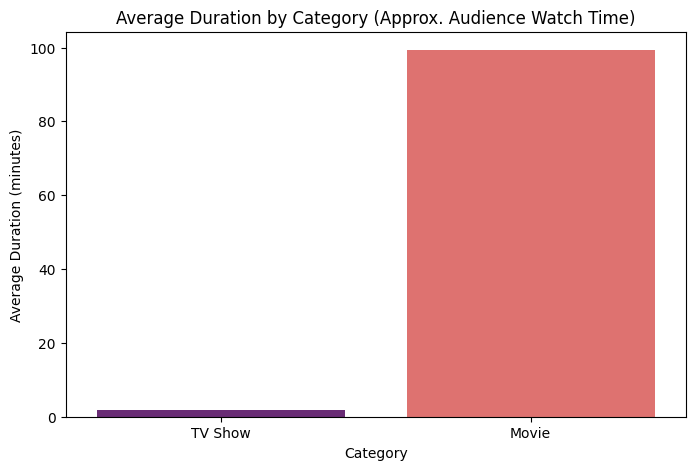

In [14]:
avg_duration = df.groupby('Category')['Duration_min'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='magma')
plt.title('Average Duration by Category (Approx. Audience Watch Time)')
plt.ylabel('Average Duration (minutes)')
plt.show()


**Category vs Rating Heatmap (Audience Distribution)**

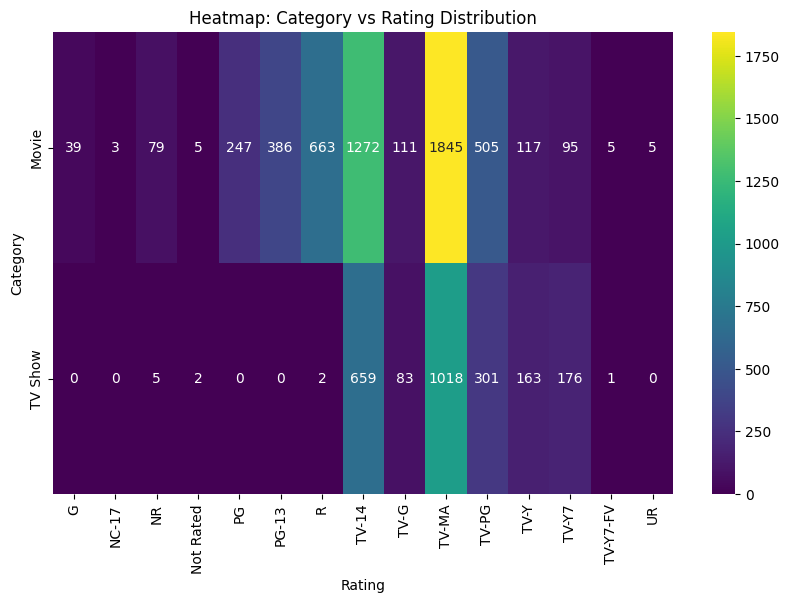

In [21]:
plt.figure(figsize=(10,6))
category_rating = pd.crosstab(df['Category'], df['Rating'])
sns.heatmap(category_rating, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap: Category vs Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()


**Top 5 Movies and TV Shows by Rating**

In [20]:
top_movies = df[df['Category']=='Movie'].sort_values(by='Rating', ascending=False).head(5)
print("Top 5 Movies (by Rating):")
display(top_movies[['Title', 'Director', 'Rating', 'Country', 'Duration']])

# Top 5 TV Shows
top_shows = df[df['Category']=='TV Show'].sort_values(by='Rating', ascending=False).head(5)
print("\nTop 5 TV Shows (by Rating):")
display(top_shows[['Title', 'Director', 'Rating', 'Country', 'Duration']])

Top 5 Movies (by Rating):


,Title,Director,Rating,Country,Duration
2484,Good Luck Chuck,Mark Helfrich,UR,"United States, Canada",99 min
7730,You Don't Mess with the Zohan,Dennis Dugan,UR,United States,113 min
5574,Shootout at Lokhandwala,Apoorva Lakhia,UR,India,116 min
5523,Sex Doll,Sylvie Verheyde,UR,"United Kingdom, France",103 min
2953,Immoral Tales,Walerian Borowczyk,UR,France,103 min



Top 5 TV Shows (by Rating):


,Title,Director,Rating,Country,Duration
4589,Oh No! It's an Alien Invasion,Unknown,TV-Y7-FV,Canada,2 Seasons
7445,Voltron: Legendary Defender,Unknown,TV-Y7,United States,8 Seasons
5240,Robozuna,Unknown,TV-Y7,United Kingdom,2 Seasons
5238,Robot Trains,Unknown,TV-Y7,South Korea,2 Seasons
6693,The Mr. Peabody and Sherman Show,Unknown,TV-Y7,United States,4 Seasons


## Strategic Insights

1. Majority of content is [insert analysis: Movies or TV Shows].
2. Leading countries contributing content are [insert top countries].
3. Popular genres or types can be inferred from Description or Type columns.

**Recommendations:**
- Increase content in underrepresented genres or countries.
- Balance Movies vs TV Shows based on audience trends.
- Focus on markets showing growth opportunities.
**bold text**

## Conclusion

Netflix’s content trends analysis shows patterns in Movies, TV Shows, genres, and country-wise contributions.
These insights will guide strategic decisions for content acquisition and global expansion.
